In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import re
import string
import math
import gensim.downloader as api
import sklearn
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import inflect
import contractions
from sklearn.feature_extraction.text import TfidfVectorizer

AND THOU WEEP AT THE LAST, AS THY BODY AND THY FLESH ARE CONSUMED

In [2]:
print("I hate them with perfect hatred; I count them my enemies.")

I hate them with perfect hatred; I count them my enemies.


Retrieve Data.

In [3]:
df = pd.read_excel("Dataset.xlsx")
questionList = df["Question"].unique()
answerList = df["Answer"]
for answer in answerList:
    print(answer)
print("Answer list : {}".format(len(answerList)))
print("Question list : {}".format(len(questionList)))

Everybody should believe that they are creations, made by a creator. It is a prerequisite to believing anything else that comes after.
We came from evolution. This is undeniable, and the Charles Darwin's evolution model is the most widely accepted theory to this. We evolved from unicellular bacteriae, to fish, to amphibious creatures, to mammals, to apes, then all the way to humans.
We don't really need to exist. Even if I don't exist, everything would go on as it's supposed to be. My existence is one amongst many. It should not gravely affect the world and life would go on.
I don't think we need to exist. As Peter said, everything would just go on as usual, regardless of your existence or not.
I think we are a part of a bigger picture.
Yes, because we're a part of a community where God put us in. There should be a purpose and meaning to it, shouldn't it?
In general,  humans have made many impacts. The term 'butterfly effect' supports this statement; what if most of it is negative impa

Preprocessing

In [4]:
# this function returns a list of tokens, cleaned and preprocessed. 
def preprocess_document(corpus, isLemma=False, isStopwords=False, isInflect=False, isNumberFiltered=True):   
   
   inflector = inflect.engine() # prepare inflector
   stop_words = set(stopwords.words("english"))
   lemmatizer = WordNetLemmatizer()
   punctuations = string.punctuation

   # if numbers are filtered, add that to the punctuation string
   if isNumberFiltered:
      punctuations += "1234567890"

   # case fold
   corpus = corpus.lower()

   # remove puncs
   corpus = "".join([char for char in corpus if char not in punctuations])

   # tokenize it.
   token_list = nltk.word_tokenize(corpus)

   for i in range(len(token_list)):
      # if inflect
      if isInflect:
         if token_list[i].isdigit():
            token_list[i] = inflector.number_to_words(token_list[i])

      # if lemma
      if isLemma:
         tagged_word = nltk.pos_tag([token_list[i]])
         wordnet_pos = get_wordnet_pos(tagged_word[0][1])
         token_list[i] = lemmatizer.lemmatize(tagged_word[0][0], pos=wordnet_pos)
      
      # if stopword
      if isStopwords:
         if token_list[i] in stop_words or token_list[i].isdigit():
            token_list[i] = "#" # mark as #
      
   # remove the marked strings
   token_list = [token for token in token_list if token != "#"]
   return token_list
            
def get_wordnet_pos(tag):
    """Map POS tag to WordNet POS tag"""
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN # solves as noun by default.

Get Word Set

In [5]:
def get_word_set(df):
    bigtext = ""
    # join in lower case
    for i in range(len(df)):
        bigtext += " {}".format(df[i].lower())
    bigtext = contractions.fix(bigtext) # remove contractions
    bigtext = "".join([char for char in bigtext if char not in string.punctuation]) # remove punctuations
    big_text_tokens = preprocess_document(bigtext, isLemma=True) # put in blender like dick
    return set(big_text_tokens) # return as set


my_word_set = get_word_set(df["Answer"])
print(len(my_word_set))
for word in my_word_set:
    print(word)

504
mistake
special
mammal
right
heartbeat
process
more
choose
negative
grow
may
conceive
statement
sinner
some
personal
over
specie
nature
baby
innately
widely
need
rap
marries
from
gravely
assault
animal
grateful
prolife
can
model
pregnancy
harder
fun
way
middle
me
same
optimal
everbody
chimpanzee
indonesia
unforgivable
charles
so
man
valuable
suppose
ask
freewill
holy
much
accident
god
very
derive
worship
different
charge
though
ideal
lesser
fight
come
know
everybody
no
regulation
aspect
purpose
death
force
consider
truly
and
when
lead
full
both
that
balance
period
incidental
just
live
path
conflict
thing
himself
advanced
therefore
between
prochoice
fit
human
whom
suffer
legal
reason
but
holiness
orphanage
elderly
determine
would
nothing
how
unholiness
teenager
born
couple
long
let
week
take
of
love
retract
all
sane
receive
see
this
sanction
religion
while
nobody
one
contribute
bad
something
eye
you
fetus
altogether
birth
aka
christian
adult
outlet
moral
realistic
always
subject
oth

In [6]:
# get all words
word_list = ""
for i in range(len(df)):
    word_list += " {}".format(df["Answer"][i])

word_list = word_list.lower()

word_list = contractions.fix(word_list)
    
# remove punctuations
corpus = "".join([char for char in word_list if char not in string.punctuation])

word_set = set()
for word in nltk.word_tokenize(corpus):
    word_set.add(corpus)
word_tokens = preprocess_document(word_list, isLemma=True)
word_set = set(word_tokens)
print(len(word_set))
for word in word_set:
    print(word)

504
mistake
special
mammal
right
heartbeat
process
more
choose
negative
grow
may
conceive
statement
sinner
some
personal
over
specie
nature
baby
innately
widely
need
rap
marries
from
gravely
assault
animal
grateful
prolife
can
model
pregnancy
harder
fun
way
middle
me
same
optimal
everbody
chimpanzee
indonesia
unforgivable
charles
so
man
valuable
suppose
ask
freewill
holy
much
accident
god
very
derive
worship
different
charge
though
ideal
lesser
fight
come
know
everybody
no
regulation
aspect
purpose
death
force
consider
truly
and
when
lead
full
both
that
balance
period
incidental
just
live
path
conflict
thing
himself
advanced
therefore
between
prochoice
fit
human
whom
suffer
legal
reason
but
holiness
orphanage
elderly
determine
would
nothing
how
unholiness
teenager
born
couple
long
let
week
take
of
love
retract
all
sane
receive
see
this
sanction
religion
while
nobody
one
contribute
bad
something
eye
you
fetus
altogether
birth
aka
christian
adult
outlet
moral
realistic
always
subject
oth

TF-IDF function

In [7]:
# takes a bunch of documents and make a TF-IDF out of them. Returns a tf-idf matrix and a df as well
# this assumes the documents are ALREADY PREPROCESSED to avoid differences in preprocessing, therefore anachronism.
def get_tfidf(documents, isPreprocessed=True):
    if not isPreprocessed:
        documents = [preprocess_document(doc, isLemma=True, isStopwords=True) for doc in documents]
    flattened_documents = [' '.join(doc) for doc in documents]
    vectorizer = TfidfVectorizer()
    matrix = vectorizer.fit_transform(flattened_documents)
    tfidf_keys  = vectorizer.get_feature_names_out()
    df_tfidf = pd.DataFrame(matrix.toarray(), columns=tfidf_keys)

    return df_tfidf, matrix

Get TF-IDF matrix

In [8]:
my_tfidf, my_matrix = get_tfidf(df["Answer"], isPreprocessed=False)
my_tfidf
my_matrix

<72x434 sparse matrix of type '<class 'numpy.float64'>'
	with 774 stored elements in Compressed Sparse Row format>

Word and Sentence Embeddings

In [9]:
# load and use the word embedding
import gensim
import gensim.downloader as api
from nltk.test.gensim_fixt import setup_module
setup_module()

model = api.load('word2vec-google-news-300')

Functions to word- and sentence-embed a document

In [10]:
# embed the individual words of a document. takes a list of tokens and a w2v model, returns a list of tuples(word, 300d vector).
def word_embed(document, model):
    word_embed_pairs = []
    for word in document:
        if word in model:
            word_embed_pairs.append((word, model[word]))
    return word_embed_pairs

def sentence_embed_unweighted_doc(word_embed_pair_list, aggregateMethod="avg"):
    wvs = []
    for pair in word_embed_pair_list:
        wvs.append(pair[1])
    if aggregateMethod == "avg":
        return np.mean(wvs, axis=0)
    else:
        return np.sum(wvs, axis=0)

def sentence_embed_unweighted(word_embedded_docs, aggregateMethod="avg"):
    sentence_embedded_docs = []
    for i in range(len(word_embedded_docs)):
        sentence_embedded_docs.append(sentence_embed_unweighted_doc(word_embedded_docs[i], aggregateMethod))
    return sentence_embedded_docs

# embed the words into sentences with a preferred method. takes a list of tuples (word, 300d vector), a tfidf matrix, and an index. returns a 300d vector aggregated sentence with the preferred method.
def sentence_embed_weighted_doc(word_embed_pair_list, tfidf_matrix, index, aggregateMethod="avg"):
    weighted_wvs = []
    for pair in word_embed_pair_list:
        tfidf_weight = 0
        if pair[0] in tfidf_matrix:
            tfidf_weight = tfidf_matrix[pair[0]][index]
        weighted_wvs.append(pair[1] * tfidf_weight)

    weighted_wvs = np.array(weighted_wvs)
    if aggregateMethod == "avg":
        sentence_vector = np.mean(weighted_wvs, axis=0)
    else:
        sentence_vector = np.sum(weighted_wvs, axis=0)
    return sentence_vector

def sentence_embed_weighted(word_embedded_docs, tfidf_matrix, aggregateMethod="avg"):
    sentence_embedded_docs = []
    for i in range(len(word_embedded_docs)):
        sentence_embedded_docs.append(sentence_embed_weighted_doc(word_embedded_docs[i], tfidf_matrix, i, aggregateMethod))
    return sentence_embedded_docs
    

Embedding each document.

In [27]:
docs = [preprocess_document(doc, isLemma=True, isStopwords=True) for doc in df["Answer"]]
word_embedded_docs = []
for doc in docs:
    word_embedded_docs.append(word_embed(doc, model))

# sentence_embed("bababui", tfidf_matrix=my_tfidf, index=1)
doc_embeds = sentence_embed_unweighted(word_embedded_docs, "sum")

df["Document Embed"] = doc_embeds
print(len(docs))
sum = 0
for doc in docs:
    sum += len(doc)
print(sum)

72
889


The LDA Approach

In [9]:
# Remind me again how we can extract whole features from here?

# print(len(corpus_tfidf))
# sum = 0
# for thing in corpus_tfidf:
#     sum += len(thing)
# print(sum)
# # for i, doc_topic_dist in enumerate(doc_topic_distributions):
# #     print("Document", i+1)
# #     for topic_prob in doc_topic_dist:
# #         print("Topic {}: {}".format(topic_prob[0], topic_prob[1]))
# #     print("\n")

import gensim
from gensim import corpora, models
def LDA(docs, topic_prob):
    dictionary = corpora.Dictionary(docs) 
    corpus = [dictionary.doc2bow(doc) for doc in docs]
    tfidf = models.TfidfModel(corpus)
    corpus_tfidf = tfidf[corpus]
    lda_model = gensim.models.LdaModel(corpus_tfidf, num_topics=topic_prob, id2word=dictionary )
    doc_topic_distributions = lda_model[corpus]
    # view it...
    
    docFeatureList = []
    for doc_topic_dist in doc_topic_distributions:
        featureList = [0.0 for i in range(topic_prob)]
        for topic_dist in doc_topic_dist:
            featureList[topic_dist[0]] = topic_dist[1]
        docFeatureList.append(featureList)
    return docFeatureList

topicdist = LDA(docs, 10)
for topic in topicdist:
    print(topic)



NameError: name 'docs' is not defined

Code for drawing

In [24]:
from sklearn.manifold import TSNE

# returns a tsne shrinkage also...
def plot_documents(df):
    labels = np.array(df["No"])
    values = list(df["Document Embed"]) # don't forget to list it first, then np array it later.

    # train model
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(np.array(values))

    # plot
    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
    
    plt.figure(figsize=(20, 20)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()
    # use the thing to find new clusters.
    return new_values


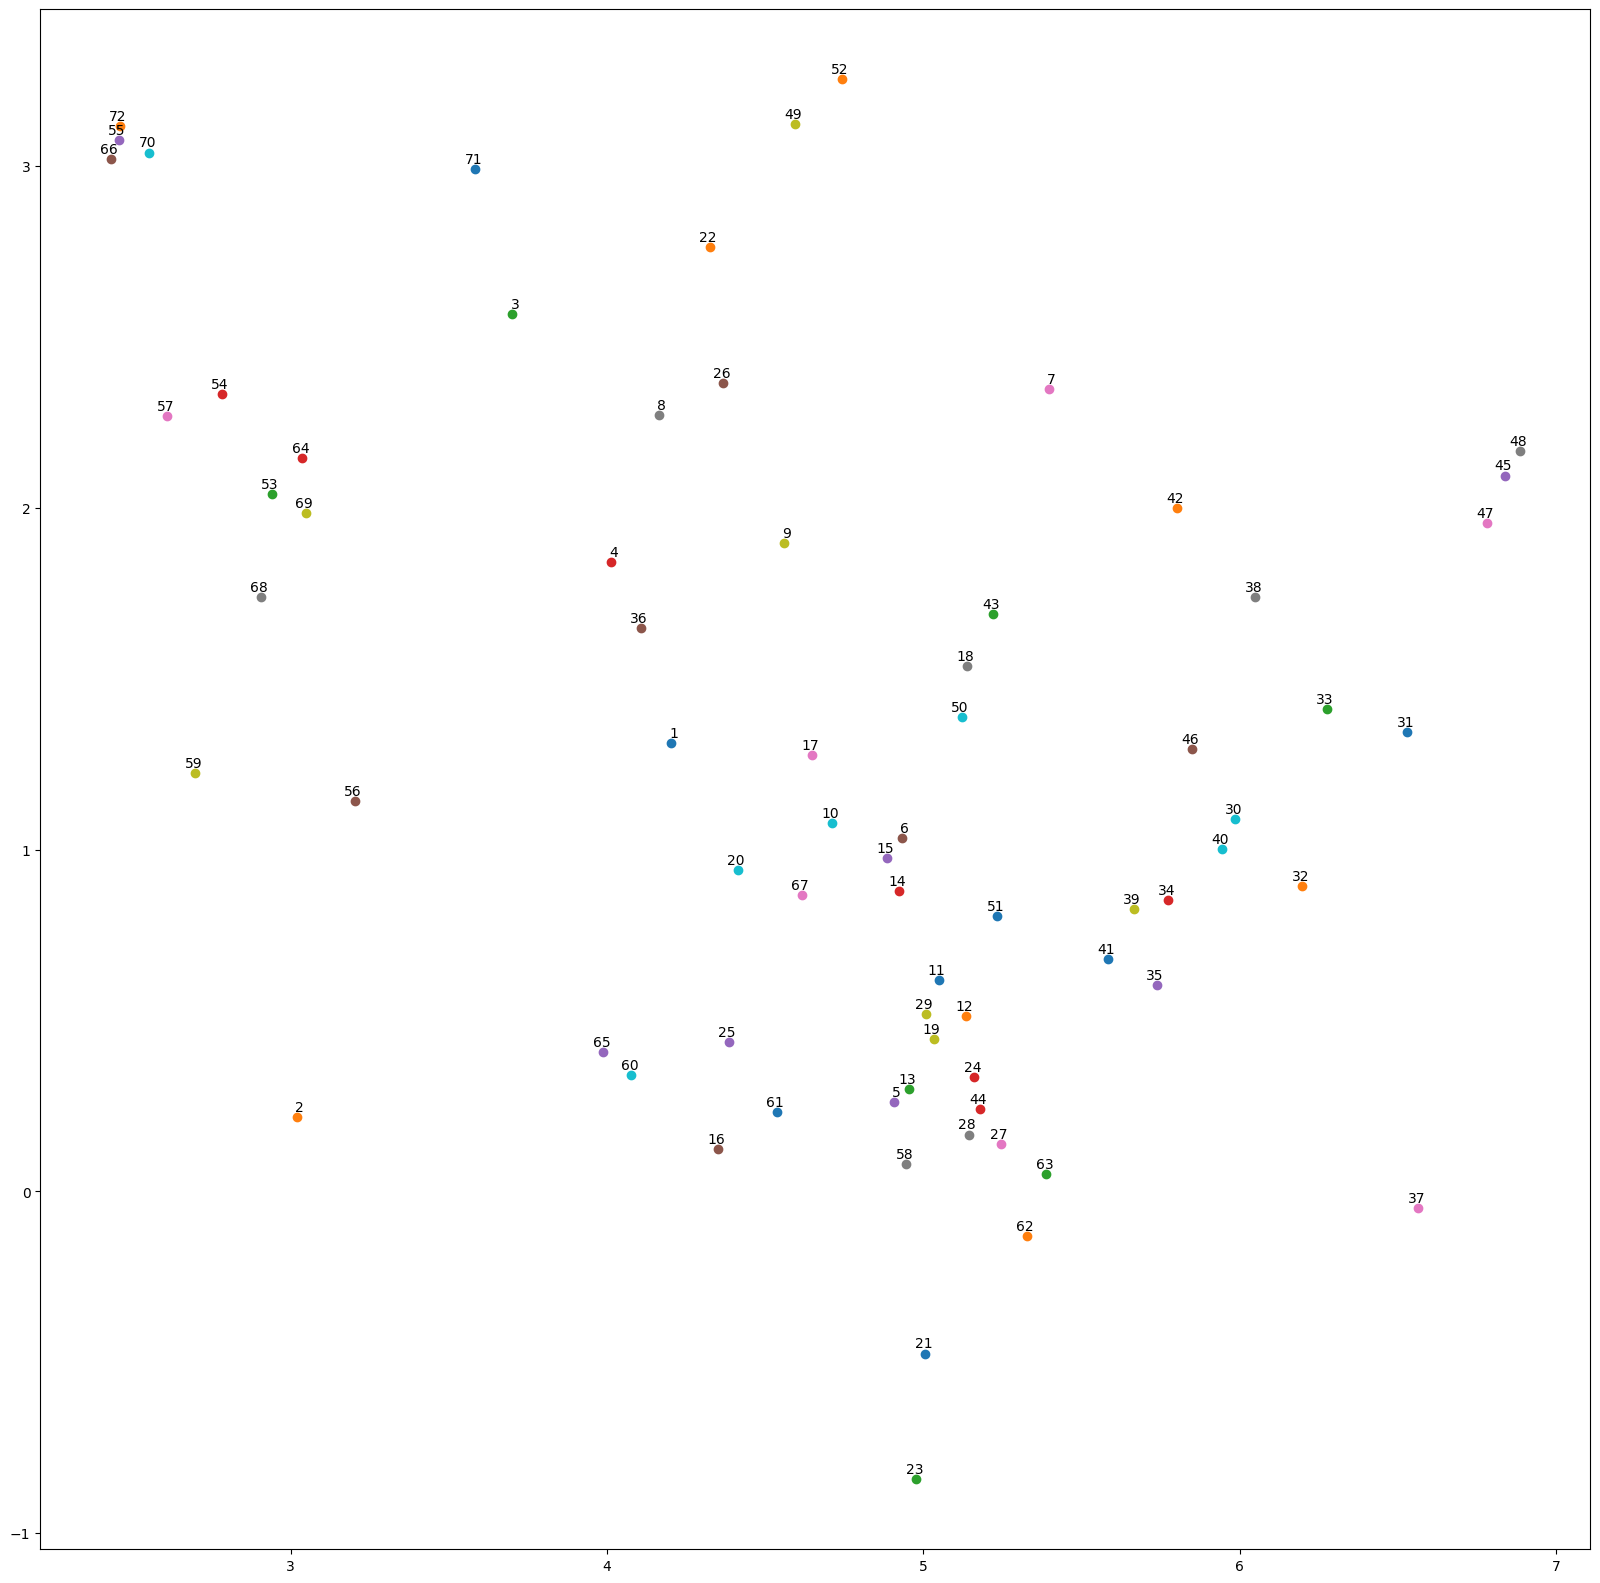

In [28]:
tsne_values = plot_documents(df)

Der DBSCAN

In [11]:
from sklearn.cluster import DBSCAN

def dbscan_draw(vectors, epsilon, min):
    dbscan = DBSCAN(eps=epsilon, min_samples=min)
    clusters = dbscan.fit_predict(vectors)
    plt.title("to the depths of depravity {} and the cusp of blasphemy {}.".format(epsilon, min))
    plt.scatter(vectors[:, 0], vectors[:, 1], c=clusters)
    plt.show()
    print(clusters)
    

Putting it all together in a function

In [12]:
# function takes a df from sql table (presumably) and spits out a DF with feature embeddings.

def ExtractFeatures(method, model, isWeighted=True, aggregateMethod="avg", epsilon=0.01, minsamp=2, topics=5):
    # initialize components that need to be initialized.

    # extract the dataset in df
    df = pd.read_excel("Dataset.xlsx")

    # preprocess each document
    preprocessed_docs = [preprocess_document(doc, isLemma=True, isStopwords=True) for doc in df["Answer"]]

    # prepare a word-set
    # my_word_set = get_word_set(df)
 
    # prepare TF-IDF matrix for weighted embedding or weighted LDA
    if isWeighted:
        my_tfidf, my_matrix = get_tfidf(preprocessed_docs)

    # choose feature extraction (embed or LDA)
    doc_embeds = []
    if method == "embed":
        word_embedded_docs = [word_embed(doc, model) for doc in preprocessed_docs] # word embedding
        # choose sentence embedding method here
        if isWeighted:
            doc_embeds = sentence_embed_weighted(word_embedded_docs, my_tfidf, aggregateMethod)
        else:
            doc_embeds = sentence_embed_unweighted(word_embedded_docs, aggregateMethod)
    elif method == "lda":
       doc_embeds = LDA(preprocessed_docs, topics)

    # append embedding to each document
    if doc_embeds:  
        df["Document Embed"] = doc_embeds
    
    # get reduced values and draw the thang
    tsne_values = plot_documents(df)
    dbscan_draw(tsne_values, epsilon, minsamp) 

    # # return the DF
    # return df
    

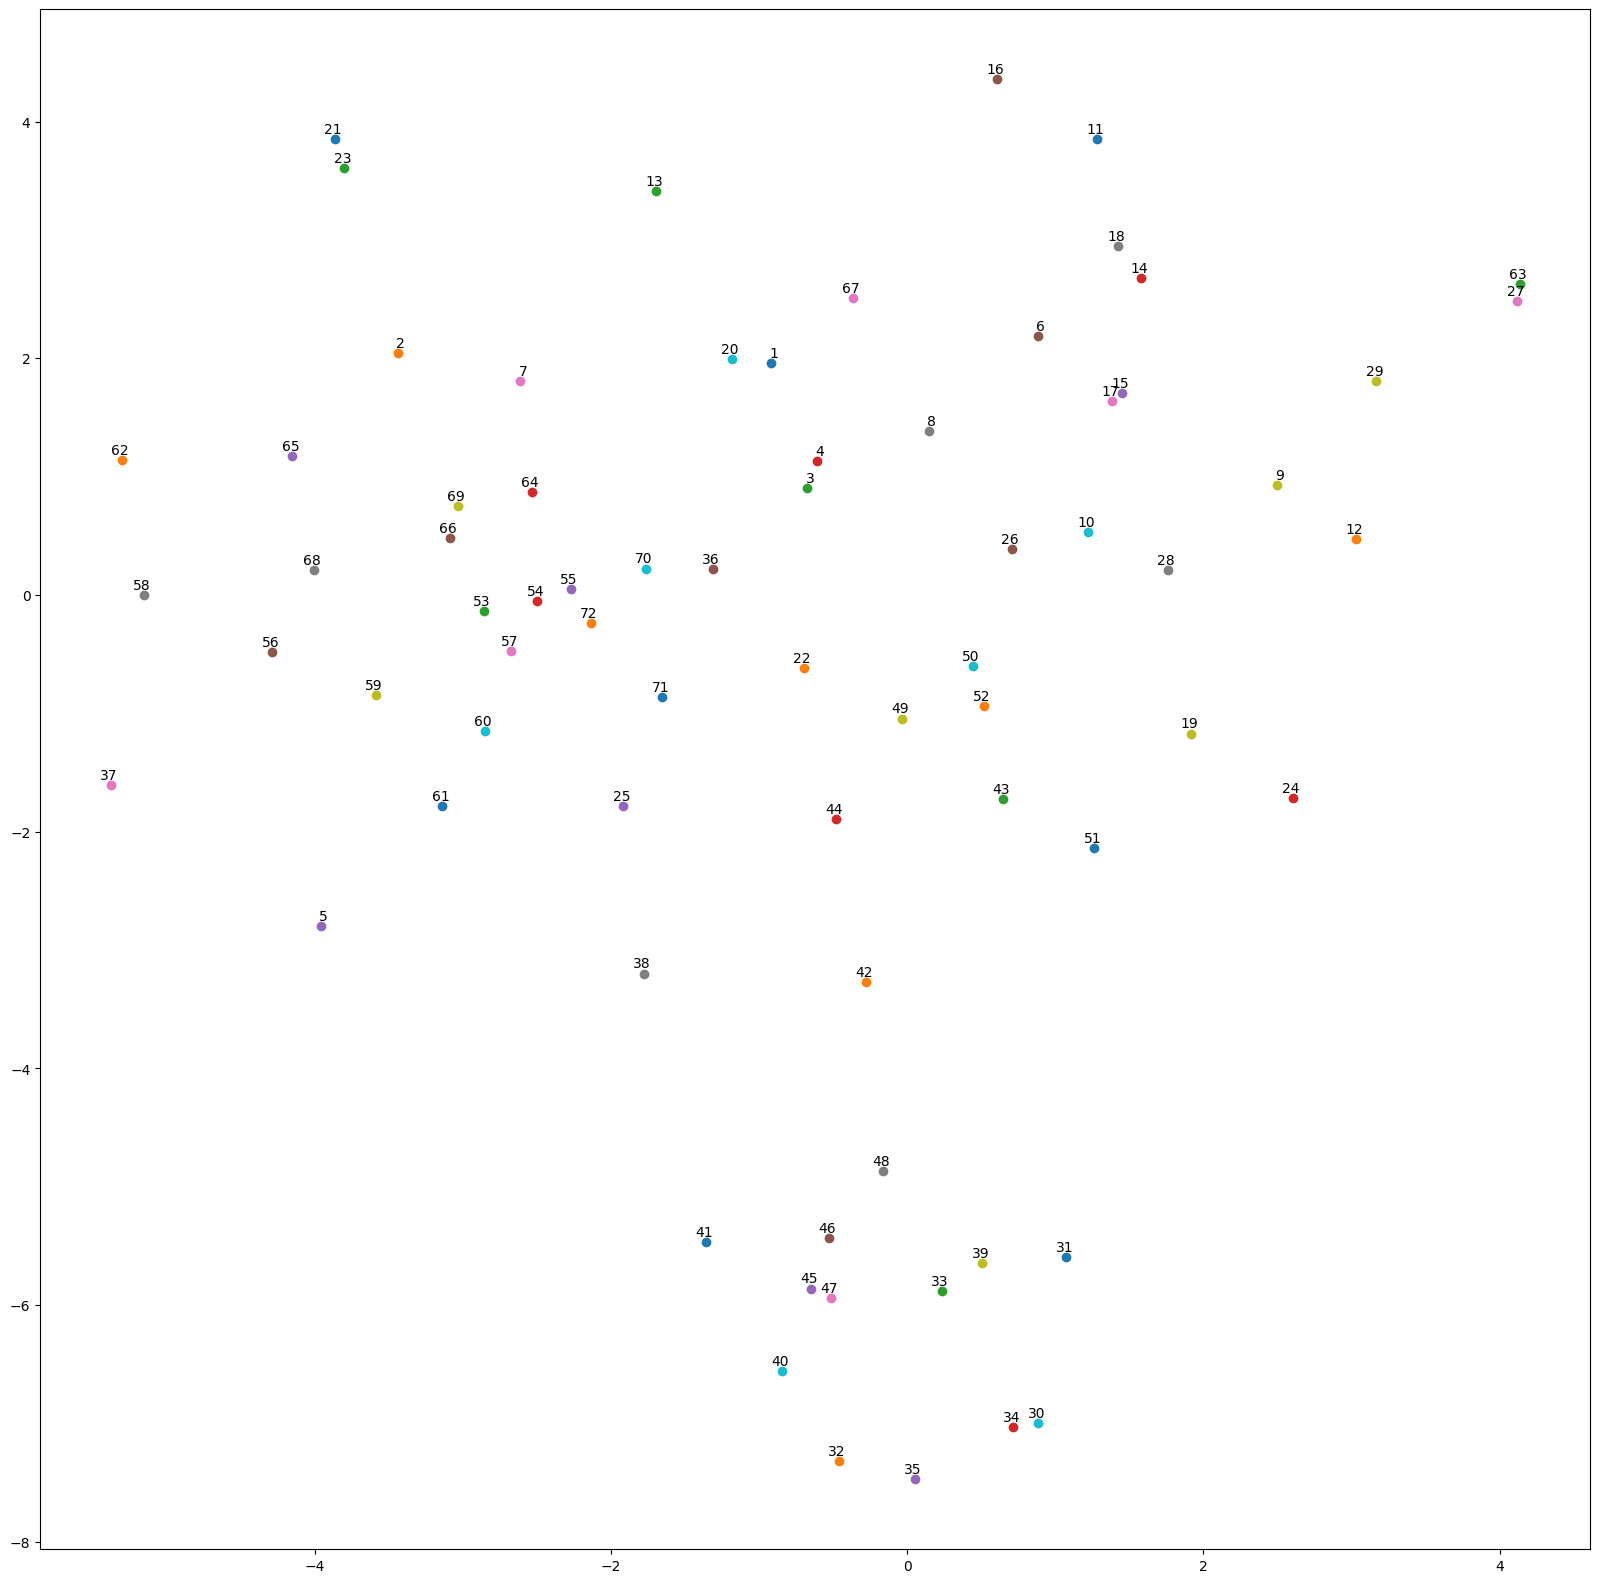

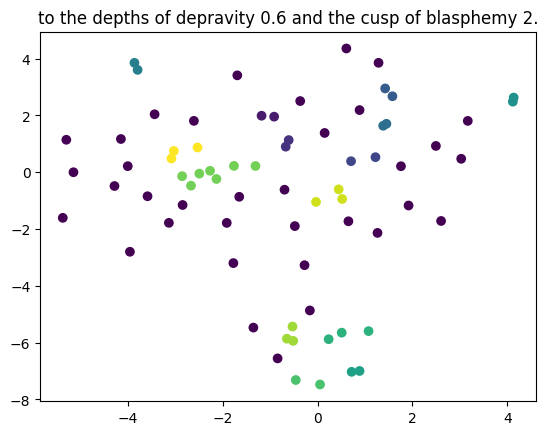

[ 0 -1  1  1 -1 -1 -1 -1 -1  2 -1 -1 -1  3  4 -1  4  3 -1  0  5 -1  5 -1
 -1  2  6 -1 -1  7  8  9  8  7  9 10 -1 -1  8 -1 -1 -1 -1 -1 11 11 11 -1
 12 12 -1 12 10 10 10 -1 10 -1 -1 -1 -1 -1  6 13 -1 13 -1 -1 13 10 -1 10]


In [24]:
ExtractFeatures("embed", model, isWeighted=False, aggregateMethod="avg", epsilon=0.6, minsamp=2) 

Invoke the functions here

In [ ]:
epsilonRange = np.arange(0.01, 5, 0.01)
minSampRange = np.arange(2, 5, 1)
topicRange = np.arange(5, 20, 1)
experimentParams = {
    "featureExtractionMethod" : ["embed", "lda"],
    "isWeighted" : [True, False],
    "aggregateMethod" : ["sum", "avg", "var"],
    "epsilon": epsilonRange,
    "minSamp" : minSampRange,
    "topic" : topicRange
}

def DoAll(params):
    for fa_method in params["featureExtractionMethod"]:
        if params["featureExtractionMethod"] == "embed":
            for aggregateMethod in params["aggregateMethod"]:
                for isWeight in params["isWeighted"]:
                    for epsilon in params["epsilon"]:
                        for minSamp in params["minSamp"]:
                            print(fa_method, model, isWeight, aggregateMethod, epsilon, minSamp)
                            ExtractFeatures(fa_method, model=model, isWeighted=isWeight, aggregateMethod=aggregateMethod, epsilon=epsilon, minsamp=minSamp)
        else:
            for topic in params["topic"]:
                for epsilon in params["epsilon"]:
                    for minSamp in params["minSamp"]:
                        print(fa_method, model, topic, epsilon, minSamp)
                        ExtractFeatures(fa_method, model=model, topics=topic, epsilon=epsilon, minsamp=minSamp)

DoAll(experimentParams)